In [4]:
import pandas as pd
import datetime, warnings, scipy 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
le = LabelEncoder()
%cd /content/drive/My\ Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [2]:
from tensorflow import keras
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Input, LSTM, Bidirectional, Dense, Embedding


use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
tpu_address = TF_MASTER
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.2.38.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.2.38.82:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")

In [6]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [ ]:
train.pop('YEAR')
train.pop('FLIGHT_NUMBER')
train.pop('TAIL_NUMBER')
train.pop('DEPARTURE_TIME')

0          2354.0
1             2.0
2            18.0
3            15.0
4            24.0
            ...  
2818548    2358.0
2818549     129.0
2818550     152.0
2818551      12.0
2818552       7.0
Name: DEPARTURE_TIME, Length: 2818553, dtype: float64

In [ ]:
airports= pd.read_csv("airports.csv")
airport_dict = {i[0]:{'latitude':i[1], 'longitude':i[2]} for i in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].values}
airport_dict['ECP'] = {'latitude':30.358333, 'longitude':-85.795556}
airport_dict['UST'] = {'latitude':29.95925, 'longitude':-81.339722}
airport_dict['PBG'] = {'latitude':44.650833, 'longitude':-73.468056}

In [ ]:
train['DELAY_MEAN_PER_AIRLINE'] = train['ARRIVAL_DELAY'].groupby(train['AIRLINE']).transform('mean')
train['DELAY_MEAN_PER_ORIGIN_AIRPORT'] = train['ARRIVAL_DELAY'].groupby(train['ORIGIN_AIRPORT']).transform('mean')
train['DELAY_MEAN_PER_DESTINATION_AIRPORT'] = train['ARRIVAL_DELAY'].groupby(train['DESTINATION_AIRPORT']).transform('mean')
test['DELAY_MEAN_PER_ORIGIN_AIRPORT'] = train['ARRIVAL_DELAY'].groupby(train['ORIGIN_AIRPORT']).transform('mean')
test['DELAY_MEAN_PER_DESTINATION_AIRPORT'] = train['ARRIVAL_DELAY'].groupby(train['DESTINATION_AIRPORT']).transform('mean')
test['DELAY_MEAN_PER_AIRLINE'] = train['ARRIVAL_DELAY'].groupby(train['AIRLINE']).transform('mean')

In [ ]:
for col in ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'WHEELS_OFF']:
    train[col] = train[col].map(lambda x : 60*(x/100) + (x % 100))

In [ ]:
origin_airport = train.pop('ORIGIN_AIRPORT')
destination_airport = train.pop('DESTINATION_AIRPORT')
origin_airport = origin_airport.map(lambda x : x if x in airport_dict else iata_dict[bts_dict[str(x)]])
destination_airport = destination_airport.map(lambda x : x if x in airport_dict else iata_dict[bts_dict[str(x)]])
train['ORIGIN_LATITUDE'] = origin_airport.map(lambda x : airport_dict[x]['latitude'])
train['ORIGIN_LONGITUDE'] = origin_airport.map(lambda x : airport_dict[x]['longitude'])
train['DESTINATION_LATITUDE'] = destination_airport.map(lambda x : airport_dict[x]['latitude'])
train['DESTINATION_LONGITUDE'] = destination_airport.map(lambda x : airport_dict[x]['longitude'])

In [ ]:
origin_airport = test.pop('ORIGIN_AIRPORT')
destination_airport = test.pop('DESTINATION_AIRPORT')
test['ORIGIN_LATITUDE'] = origin_airport.map(lambda x : airport_dict[x]['latitude'])
test['ORIGIN_LONGITUDE'] = origin_airport.map(lambda x : airport_dict[x]['longitude'])
test['DESTINATION_LATITUDE'] = destination_airport.map(lambda x : airport_dict[x]['latitude'])
test['DESTINATION_LONGITUDE'] = destination_airport.map(lambda x : airport_dict[x]['longitude'])

In [ ]:
test.pop('YEAR')
test.pop('FLIGHT_NUMBER')
test.pop('TAIL_NUMBER')
test.pop('DEPARTURE_TIME')

0           41.0
1         2400.0
2         2400.0
3           53.0
4           17.0
           ...  
514379    2356.0
514380      12.0
514381    2355.0
514382       4.0
514383    2357.0
Name: DEPARTURE_TIME, Length: 514384, dtype: float64

In [ ]:
for col in ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'WHEELS_OFF']:
    test[col] = test[col].map(lambda x : 60*(x/100) + (x % 100))

In [ ]:
dums = [ 'DAY', 'DAY_OF_WEEK']
for i in dums:
    print ("dummifying", i)
    p = train.pop(i)
    dummies = pd.get_dummies(p, prefix=i)
    train = pd.concat([train, dummies[dummies.columns[1:]]], axis=1)

for i in dums:
    print ("dummifying", i)
    p = test.pop(i)
    dummies = pd.get_dummies(p, prefix=i)
    test = pd.concat([test, dummies[dummies.columns[1:]]], axis=1)
print ("DONE")

dummifying DAY
dummifying DAY_OF_WEEK
dummifying DAY
dummifying DAY_OF_WEEK
DONE


In [ ]:
train['AIRLINE']= le.fit_transform(train['AIRLINE'])
test['AIRLINE']= le.fit_transform(test['AIRLINE'])

In [ ]:
train.loc[:, 'center_latitude'] = (train['ORIGIN_LATITUDE'].values + train['DESTINATION_LATITUDE'].values) / 2
train.loc[:, 'center_longitude'] = (train['ORIGIN_LONGITUDE'].values + train['DESTINATION_LONGITUDE'].values) / 2
test.loc[:, 'center_latitude'] = (test['ORIGIN_LATITUDE'].values + test['DESTINATION_LATITUDE'].values) / 2
test.loc[:, 'center_longitude'] = (test['ORIGIN_LONGITUDE'].values + test['DESTINATION_LONGITUDE'].values) / 2
coords = np.vstack((train[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].values,
                    train[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']].values,
                    test[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']].values,
                    test[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']].values))

sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

train.loc[:, 'ORIGIN_cluster'] = kmeans.predict(train[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])
train.loc[:, 'DESTINATION_cluster'] = kmeans.predict(train[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])
test.loc[:, 'ORIGIN_cluster'] = kmeans.predict(test[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])
test.loc[:, 'DESTINATION_cluster'] = kmeans.predict(test[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])
pca = PCA().fit(coords)
train['ORIGIN_pca0'] = pca.transform(train[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])[:, 0]
train['ORIGIN_pca1'] = pca.transform(train[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])[:, 1]
train['DESTINATION_pca0'] = pca.transform(train[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])[:, 0]
train['DESTINATION_pca1'] = pca.transform(train[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])[:, 1]
test['ORIGIN_pca0'] = pca.transform(test[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])[:, 0]
test['ORIGIN_pca1'] = pca.transform(test[['ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE']])[:, 1]
test['DESTINATION_pca0'] = pca.transform(test[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])[:, 0]
test['DESTINATION_pca1'] = pca.transform(test[['DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE']])[:, 1]

Outliers filteren


In [ ]:
def trim_IQR(x, alpha=0.01, rng=1.5):
    q1 = x.quantile(alpha / 2)
    q3 = x.quantile(1 - (alpha / 2))
    iqr = abs(q3 - q1)
    return [q1 - rng * iqr, q3 + rng * iqr]

valid_range = trim_IQR(train['ARRIVAL_DELAY'])
train = train.loc[(train['ARRIVAL_DELAY'] >= valid_range[0]) & (train['ARRIVAL_DELAY'] <= valid_range[1])]

In [ ]:
test.shape

(514384, 60)

In [ ]:
train.shape

(2818553, 61)

In [ ]:
X = train
y = pd.DataFrame({'ARRIVAL_DELAY':X.pop('ARRIVAL_DELAY')})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def get_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(64, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(16, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(8, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dense(2, activation='linear'),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(1,activation='linear')

  ])

In [ ]:

def get_model():
  return tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear')
  ])


In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  model = get_model()
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='mean_squared_error',
                metrics=['mean_squared_error'])

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3904      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                5

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto',)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(X_train, y_train, epochs=25, steps_per_epoch=1024 , validation_data=(X_test, y_test),validation_steps=10,callbacks=callbacks_list)
#history.history['mean_squared_error']

Epoch 1/25
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


   1/1024 [..............................] - ETA: 33:14 - loss: 1538.5227 - mean_squared_error: 1538.5227WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0027s vs `on_train_batch_end` time: 0.0172s). Check your callbacks.


1024/1024 [==============================] - ETA: 0s - loss: 1409.1593 - mean_squared_error: 1409.1594WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0025s vs `on_test_batch_end` time: 0.0140s). Check your callbacks.



Epoch 00001: val_loss improved from inf to 1102.61292, saving model to Weights-001--1102.61292.hdf5
1024/1024 [==============================] - 30s 29ms/step - loss: 1409.1593 - mean_squared_error: 1409.1594 - val_loss: 1102.6129 - val_mean_squared_error: 1102.6129
Epoch 2/25
1024/1024 [==============================] - ETA: 0s - loss: 810.6682 - mean_squared_error: 810.6683
Epoch 00002: val_loss improved from 1102.61292 to 459.53680, saving model to Weights-002--459.53680.hdf5
1024/1024 [==============================] - 23s 23ms/step - loss: 810.6682 - mean_squared_error: 810.6683 - val_loss: 459.5368 - val_mean_squared_error: 459.5368
Epoch 3/25
1023/1024 [============================>.] - ETA: 0s - loss: 409.1170 - mean_squared_error: 409.1170
Epoch 00003: val_loss improved from 459.53680 to 213.52014, saving model to Weights-003--213.52014.hdf5
1024/1024 [==============================] - 24s 23ms/step - loss: 408.9761 - mean_squared_error: 408.9761 - val_loss: 213.5201 - val_me

In [ ]:
"""# Load wights file of the best model :
 # choose the best checkpoint 
MODEL.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])"""

In [ ]:
"""with strategy.scope():
  wights_file = 'Weights-006--154.96313.hdf5'
  model.load_weights(wights_file)
  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='mean_squared_error',
                metrics=['mean_squared_error'])"""

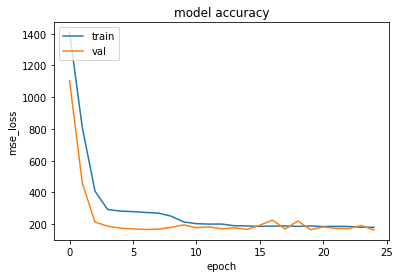

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('mse_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
kaggletest = scaler.transform(test)
predictions = model.predict(kaggletest)

In [ ]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('flights_test.csv').id,'ARRIVAL_DELAY':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

make_submission(predictions[:,0],'kagglesubmit')

A submission file has been made


In [ ]:
"""arrival_model = build_model()
arrival_model.compile(loss='mean_squared_error', optimizer='adam')
arrival_model.fit(X_train, y_train['ARRIVAL_DELAY'], verbose=1, epochs=100, batch_size=128)"""

In [ ]:
"""Xtest = scaler.transform(test)
predictions = arrival_model.predict(Xtest)"""

In [ ]:
"""def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('flights_test.csv').id,'ARRIVAL_DELAY':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

make_submission(predictions[:,0],'submission8(NN)')"""

A submission file has been made


In [ ]:
"""def build_model():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(train.shape[1],)))
    model.add(Dense(64, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(2, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='linear'))

    return model"""